<a href="https://colab.research.google.com/github/KeerthiSarayu/Covid_Data_Analysis/blob/main/CodeClause_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [17]:
covid_data = pd.read_csv("/content/country_wise_latest.csv")

In [18]:
covid_data.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [19]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [20]:
covid_data.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [21]:
covid_data.drop(["New cases", "New deaths", "New recovered", "Deaths / 100 Cases", "Recovered / 100 Cases", "Deaths / 100 Recovered", "Confirmed last week", "1 week change", "1 week % increase"], inplace=True, axis=1)

In [22]:
covid_data.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,36263,1269,25198,9796,Eastern Mediterranean
1,Albania,4880,144,2745,1991,Europe
2,Algeria,27973,1163,18837,7973,Africa
3,Andorra,907,52,803,52,Europe
4,Angola,950,41,242,667,Africa
5,Antigua and Barbuda,86,3,65,18,Americas
6,Argentina,167416,3059,72575,91782,Americas
7,Armenia,37390,711,26665,10014,Europe
8,Australia,15303,167,9311,5825,Western Pacific
9,Austria,20558,713,18246,1599,Europe


In [23]:
covid_data.tail()

,Country/Region,Confirmed,Deaths,Recovered,Active,WHO Region
182,West Bank and Gaza,10621,78,3752,6791,Eastern Mediterranean
183,Western Sahara,10,1,8,1,Africa
184,Yemen,1691,483,833,375,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,Africa
186,Zimbabwe,2704,36,542,2126,Africa


In [25]:
covid_data['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [29]:
region_wise = pd.pivot_table(covid_data, values = ["Confirmed", "Deaths", "Recovered"], index = "WHO Region", aggfunc = max)

In [31]:
region_wise["Recovery rate"] = region_wise["Recovered"] * 100 / region_wise["Confirmed"]

In [32]:
region_wise["Death rate"] = region_wise["Deaths"] * 100 / region_wise["Confirmed"]

In [33]:
region_wise = region_wise.sort_values(by = "Confirmed", ascending = False)

In [34]:
region_wise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Deaths,Recovered,Recovery rate,Death rate
WHO Region,,,,,
Americas,4290259,148011,1846641,43.042646,3.449932
South-East Asia,1480073,33408,951166,64.264803,2.257186
Europe,816680,45844,602249,73.743572,5.613459
Africa,452529,7067,274925,60.753013,1.561668
Eastern Mediterranean,293606,15912,255144,86.900131,5.419508
Western Pacific,86783,4656,78869,90.880702,5.365106


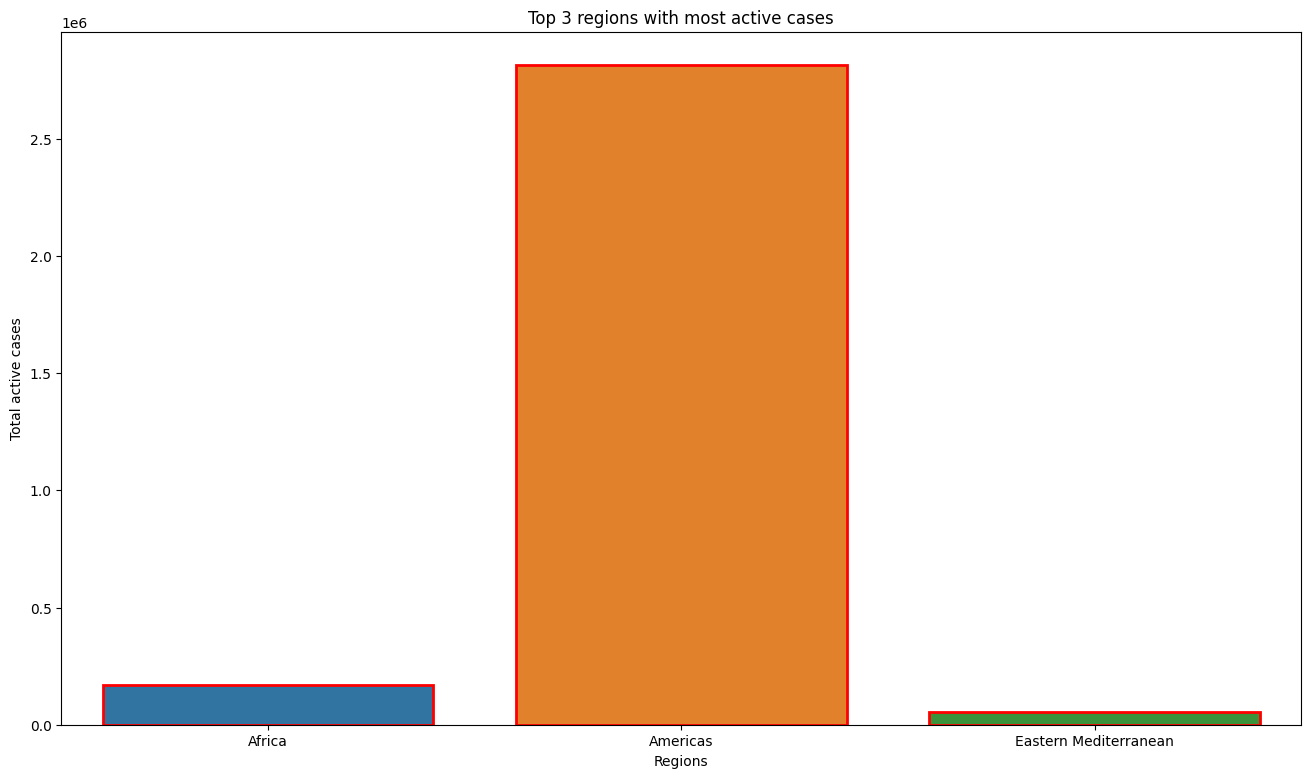

In [51]:
top_3_active_cases_regions = covid_data.groupby(by = "WHO Region").max()["Active"].reset_index()
fig = plt.figure(figsize = (16, 9))
plt.title("Top 3 regions with most active cases")
ax = sns.barplot(data = top_3_active_cases_regions.iloc[: 3], y = "Active", x = "WHO Region", linewidth = 2, edgecolor = "Red")

plt.xlabel("Regions")
plt.ylabel("Total active cases")
plt.show()

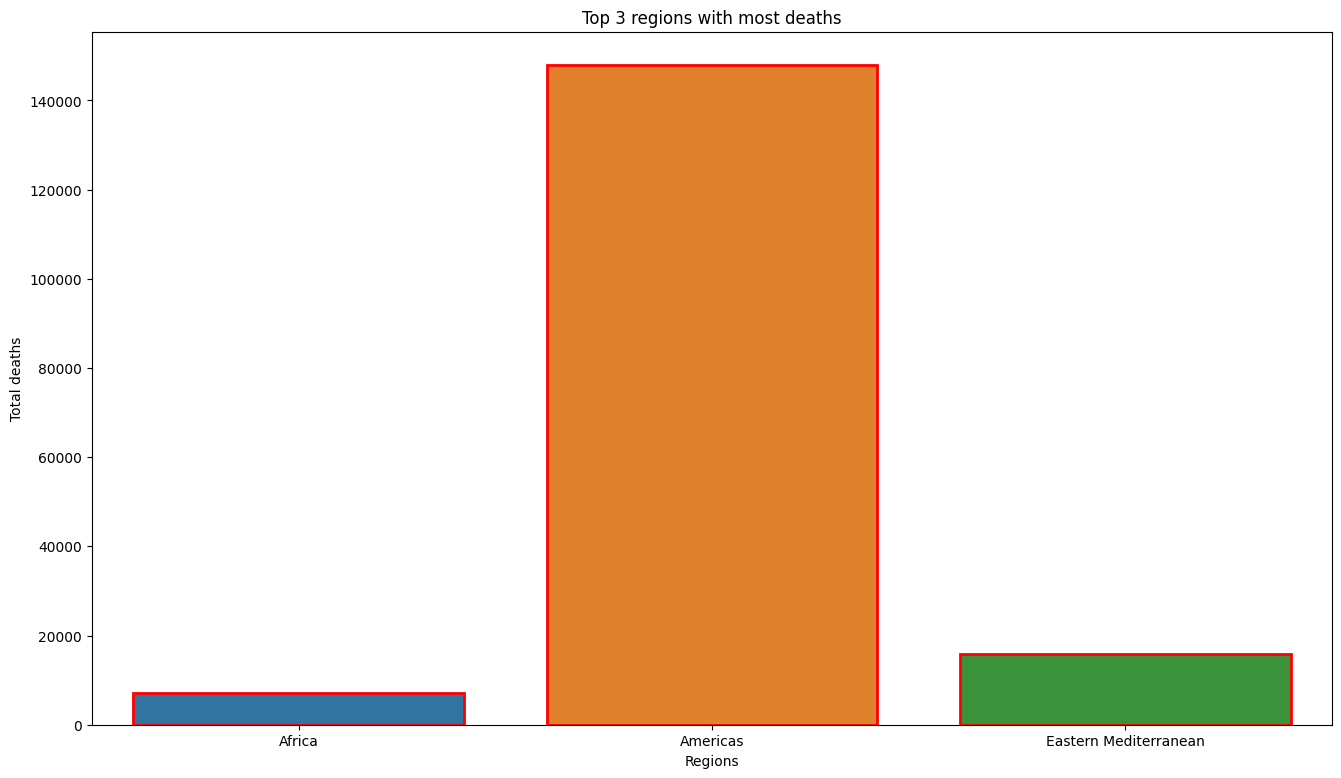

In [52]:
top_3_deaths_regions = covid_data.groupby(by = "WHO Region").max()["Deaths"].reset_index()
fig = plt.figure(figsize = (16, 9))
plt.title("Top 3 regions with most deaths")
ax = sns.barplot(data = top_3_deaths_regions.iloc[: 3], y = "Deaths", x = "WHO Region", linewidth = 2, edgecolor = "Red")

plt.xlabel("Regions")
plt.ylabel("Total deaths")
plt.show()